In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("D://data/cust.csv")

In [ ]:
#df.describe()

In [ ]:
#df.isna().sum()

In [ ]:
pd.value_counts(df['Region'])

In [ ]:
pd.value_counts(df['Channel'])

In [ ]:
df.head(5)

In [ ]:
x = df[df.columns[2:]]

In [ ]:
#x

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df_scaled = scale.fit_transform(x)

In [ ]:
x[:5]

In [ ]:
12669-df['Fresh'].mean()

In [ ]:
668/df['Fresh'].std()

In [ ]:
df_scaled[:5]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clustr = KMeans(n_clusters=5, random_state=88)

In [ ]:
final_df = x.copy()

In [ ]:
y_clustr = clustr.fit_predict(df_scaled)

In [ ]:
y_clustr

In [ ]:
final_df['clusters'] = y_clustr

In [ ]:
final_df

In [26]:
y_clustr.size

440

In [ ]:
clustr.cluster_centers_

In [ ]:
clustr.n_iter_

In [ ]:
clustr.labels_

In [ ]:
help(clustr.inertia_)

In [ ]:
# Elbow Method

In [21]:
from matplotlib import pyplot as plt

In [22]:
wcss = []

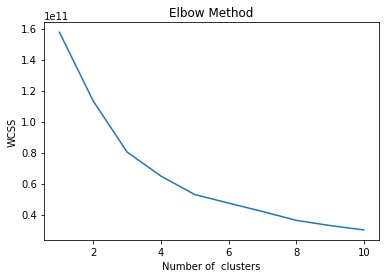

In [23]:
for i in range(1,11):
    cluster = KMeans(n_clusters=i, random_state=88)
    cluster.fit(x)
    wcss.append(cluster.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of  clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
group= final_df.groupby("clusters")

In [25]:
group.groups

{0: [4, 12, 22, 29, 33, 36, 39, 40, 52, 70, 73, 87, 89, 93, 103, 112, 124, 125, 126, 129, 141, 142, 149, 176, 181, 195, 196, 202, 239, 240, 253, 255, 258, 259, 273, 276, 277, 282, 283, 284, 285, 289, 311, 325, 334, 335, 347, 370, 371, 377, 380, 381, 382, 393, 401, 406, 413, 425, 427, 431, 435, 436], 1: [1, 2, 9, 10, 13, 14, 16, 23, 24, 28, 37, 38, 42, 43, 45, 46, 48, 49, 53, 57, 63, 67, 71, 77, 81, 82, 94, 100, 101, 106, 107, 109, 111, 145, 155, 156, 159, 160, 163, 165, 166, 170, 171, 173, 175, 182, 188, 189, 193, 197, 200, 201, 205, 209, 214, 215, 216, 218, 221, 244, 245, 254, 264, 265, 266, 268, 293, 301, 302, 303, 304, 305, 306, 309, 312, 315, 319, 331, 340, 341, 343, 346, 349, 351, 353, 357, 376, 384, 396, 407, 416, 418, 420, 426, 437], 2: [0, 3, 5, 6, 7, 8, 11, 15, 17, 18, 19, 20, 21, 25, 26, 27, 30, 31, 32, 34, 35, 41, 44, 50, 51, 54, 55, 58, 59, 60, 62, 64, 66, 68, 69, 72, 74, 75, 76, 78, 79, 80, 83, 84, 88, 90, 91, 95, 96, 97, 98, 99, 102, 104, 105, 108, 110, 113, 114, 115, 116

In [27]:
group.size()

clusters
0     62
1     95
2    272
3      1
4     10
dtype: int64

In [29]:
avg

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
clusters,,,,,,,
0,33194.548387,5057.532258,5640.290323,8472.032258,902.693548,2269.274194,0.0
1,5898.242105,10862.547368,16776.442105,1521.631579,7229.389474,1979.536842,1.0
2,9063.382353,2991.959559,3858.687500,2260.106618,1015.099265,973.606618,2.0
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,3.0
4,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,4.0


In [ ]:
#final_df.iloc[[47,61,85,86,333],]

In [28]:
avg = group.apply(np.mean)

In [ ]:
tot = group.apply(np.sum)

In [ ]:
tot

In [31]:
data_dist = pdist(df_scaled)

In [32]:
data_link = linkage(data_dist, method='complete')

In [34]:
dendrogram(data_link, labels=list(data.Country))
plt.xlabel('')
plt.ylabel('Distance')
plt.suptitle('Clustering', fontweight='bold', fontsize=10)

NameError: name 'data' is not defined